In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [15]:
data = pd.read_csv('err.txt', header= None, dtype= np.float64)
h = [8., 4., 2., 1., 1./2., 1./4., 1./8., 1./16., 1./32., 1./64., 1./128., 1./256., 1./512., 1./1024.]
x_data = np.log(h)

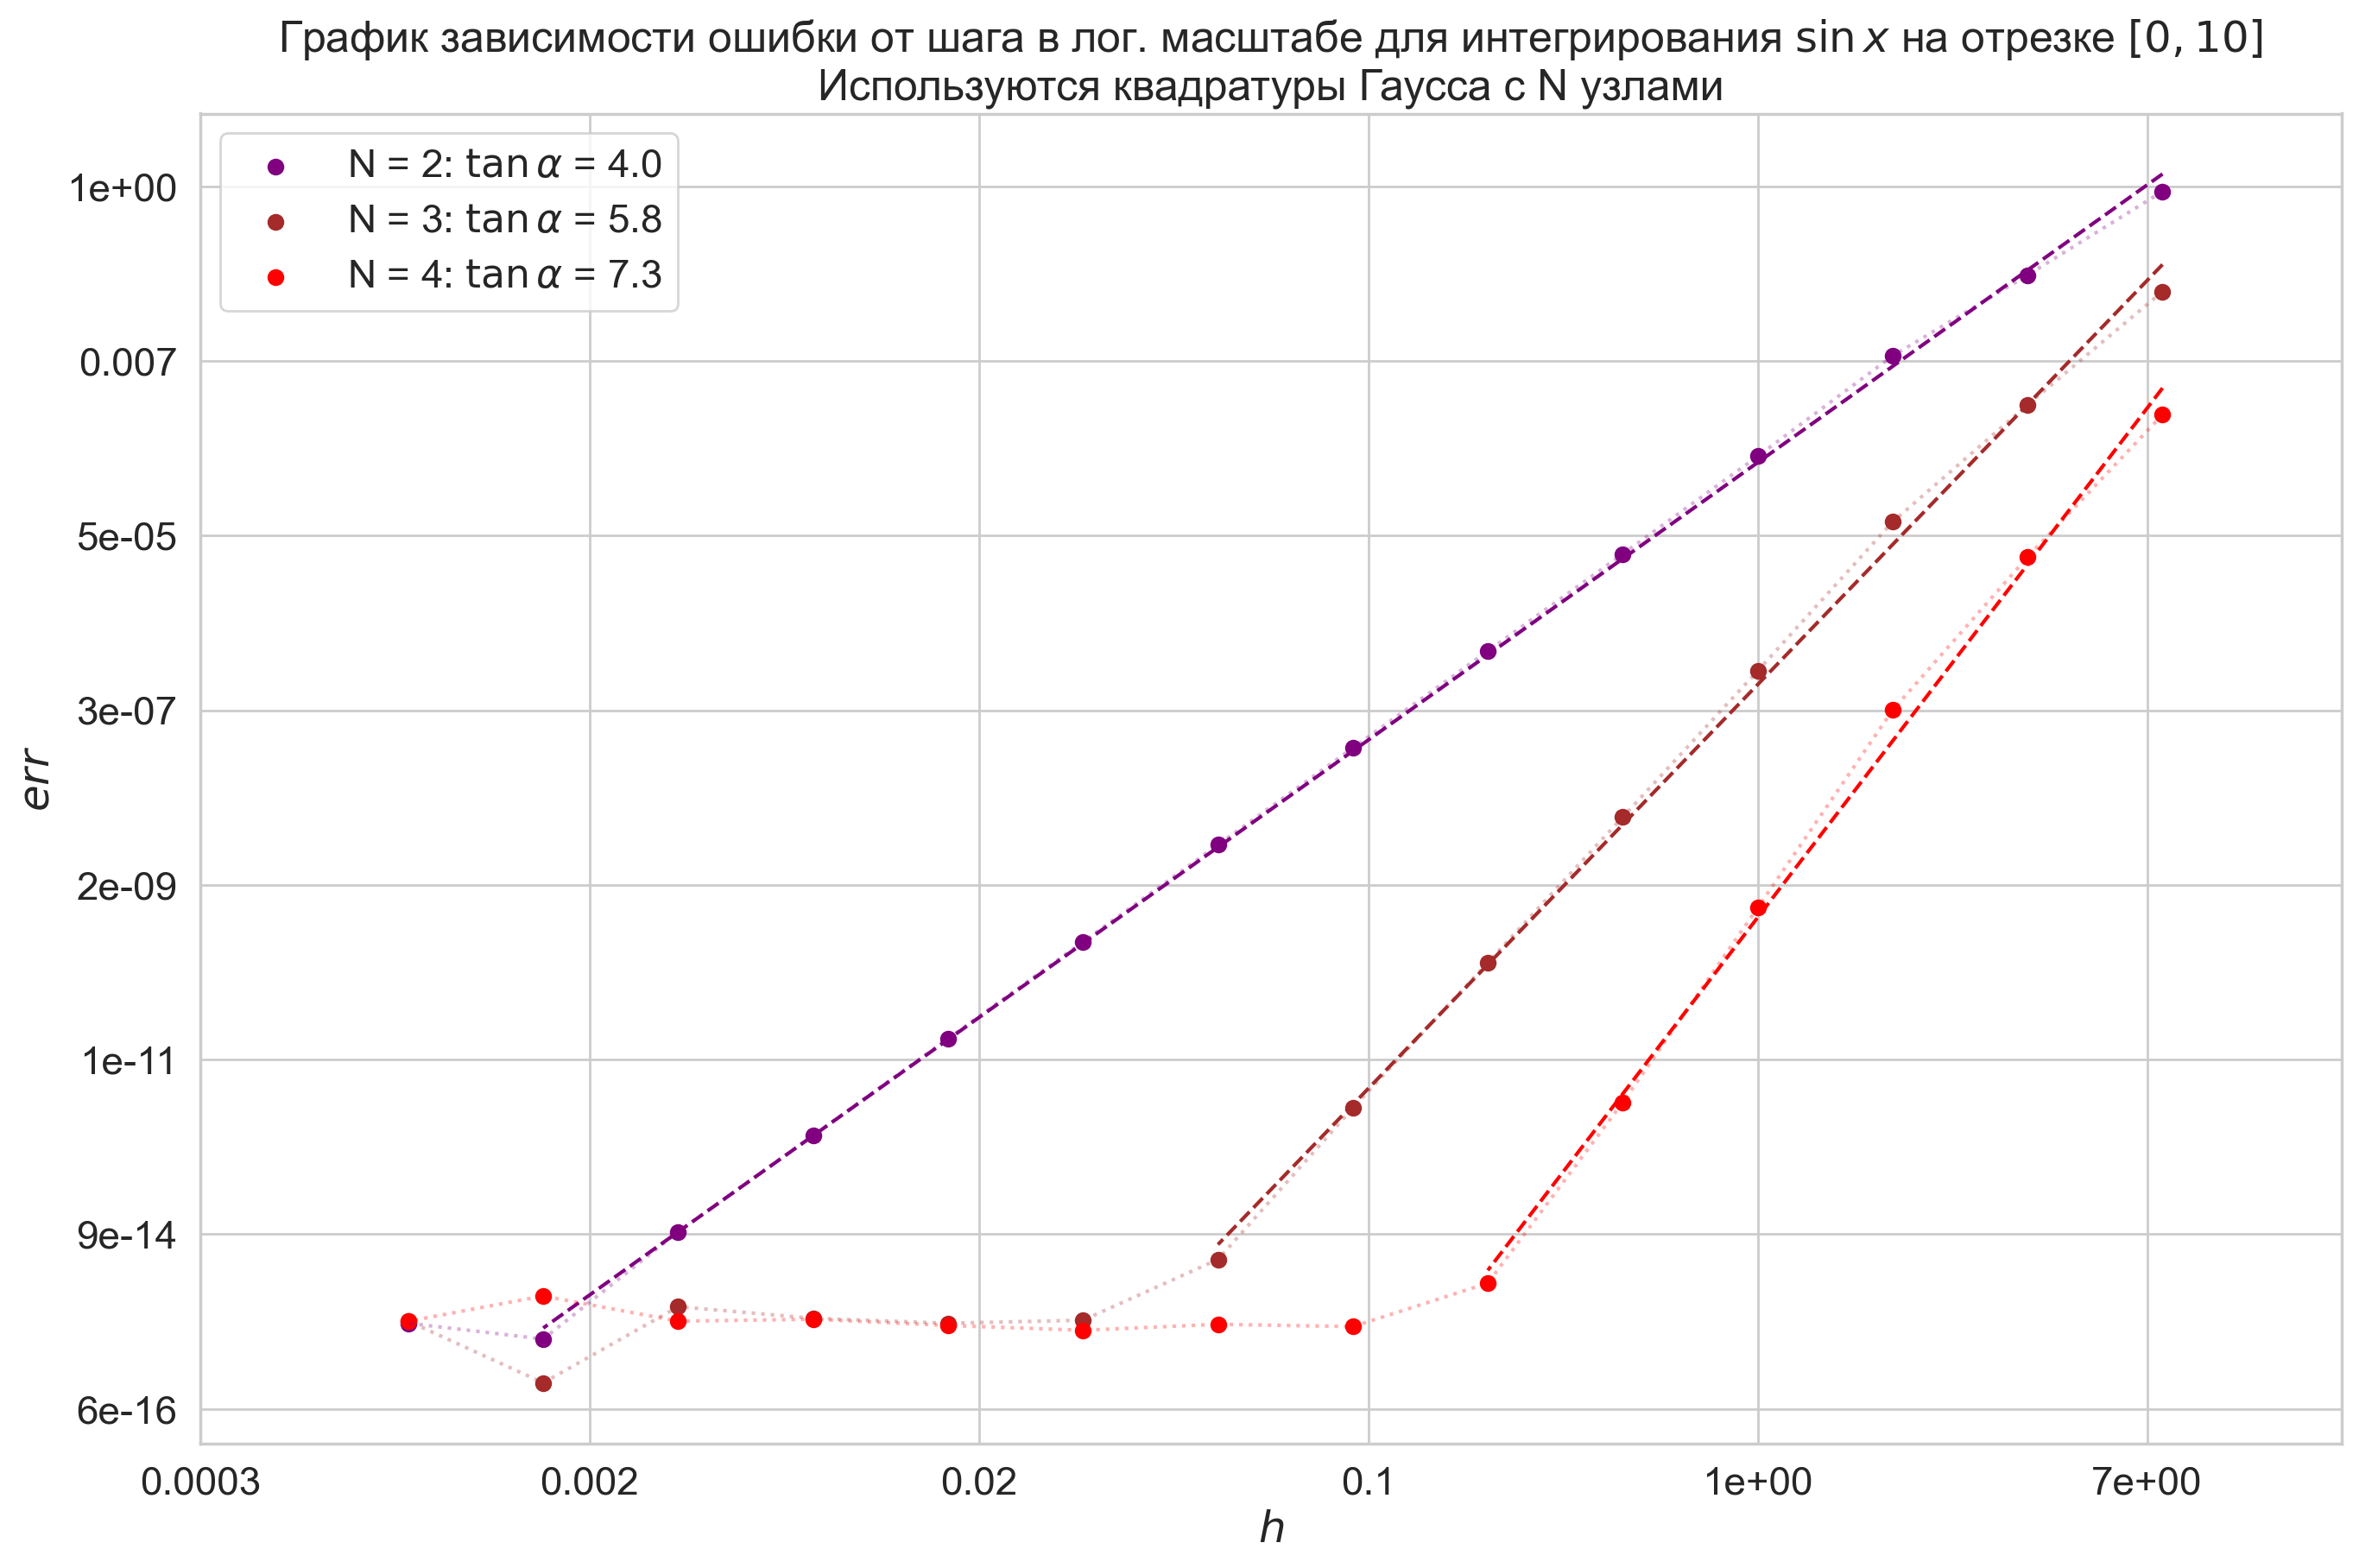

In [16]:
y_data2 = np.log(data.iloc[0, :-1])
y_data3 = np.log(data.iloc[1, :-1])
y_data4 = np.log(data.iloc[2, :-1])


p2 = np.polyfit(x_data[:-1], y_data2[:-1], 1)
y_2 = np.polyval(p2, x_data[:-1])
k2 = p2[0]

p3 = np.polyfit(x_data[:8], y_data3[:8], 1)
y_3 = np.polyval(p3, x_data[:8])
k3 = p3[0]

p4 = np.polyfit(x_data[:6], y_data4[:6], 1)
y_4 = np.polyval(p4, x_data[:6])
k4 = p4[0]

fig = plt.figure(figsize= (16,10), dpi= 200)
ax = fig.add_subplot()
plt.xlim(-8, 3)

plt.scatter(x_data, y_data2, c = 'purple', label = f'N = 2: $\\tan \\alpha$ = {k2:.1f}')
plt.plot(x_data, y_data2, c = 'purple', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:-1], y_2, c = 'purple', linestyle = '--')

plt.scatter(x_data, y_data3, c = 'brown', label = f'N = 3: $\\tan \\alpha$ = {k3:.1f}')
plt.plot(x_data, y_data3, c = 'brown', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:8], y_3, c = 'brown', linestyle = '--')

plt.scatter(x_data, y_data4, c = 'red', label = f'N = 4: $\\tan \\alpha$ = {k4:.1f}')
plt.plot(x_data, y_data4, c = 'red', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:6], y_4, c = 'red', linestyle = '--')

ax.yaxis.set_major_formatter(lambda x, pos: f'{np.exp(x):.1}')
ax.xaxis.set_major_formatter(lambda x, pos: f'{np.exp(x):.1}')

plt.title('График зависимости ошибки от шага в лог. масштабе для интегрирования $\sin x$ на отрезке $[0, 10]$\nИспользуются квадратуры Гаусса с N узлами')
plt.legend(loc = 'upper left')
plt.xlabel('$h$')
plt.ylabel('$err$')
plt.savefig(f'plot')